In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order_details = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Pizzas/order_details.csv")
orders = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Pizzas/orders.csv")
pizza_types = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Pizzas/pizza_types.csv",  encoding='latin1')
pizzas = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Pizzas/pizzas.csv")

In [ ]:
order_details.head()

In [ ]:
orders.head()

In [ ]:
pizza_types.head()

In [ ]:
pizzas.head()

In [ ]:
order_details.shape
orders.shape
pizza_types.shape
pizzas.shape

In [ ]:
order_details.dtypes

In [105]:
orders['date'] = pd.to_datetime(orders['date'])

In [106]:
orders['time'] = pd.to_datetime(orders['time'], format='%H:%M:%S')

In [ ]:
orders.dtypes

In [ ]:
orders.isnull().sum()

In [ ]:
order_details.isnull().sum()

In [ ]:
pizza_types.isnull().sum()

In [ ]:
pizzas.isnull().sum()

In [5]:
pizzas.loc[(pizzas.isnull().any(axis = 1)) & (pizzas.pizza_id == 'the_greek_xl'), 'size'] = 'XL'

In [6]:
pizzas.loc[(pizzas.isnull().any(axis = 1)) & (pizzas.pizza_id == 'the_greek_xxl'), 'size'] = 'XXL'

In [7]:
pizzas['size'] = pd.Categorical(pizzas['size'], categories = ['S', 'M', 'L', 'XL', 'XXL'], ordered = True)

In [98]:
pizzas['size'].unique()

['S', 'M', 'L', 'XL', 'XXL']
Categories (5, object): ['S' < 'M' < 'L' < 'XL' < 'XXL']

In [96]:
pizzas.groupby('size', observed=True).price.mean()

size
S      12.512500
M      15.991935
L      20.022581
XL     25.500000
XXL    35.950000
Name: price, dtype: float64

In [8]:
# 1. Total revenue generated over time (daily, weekly and monthly)
pizza_order_details = pd.merge(pizzas, order_details, on = 'pizza_id', how = 'inner')

In [9]:
pizza_order_details['total_revenue'] = pizza_order_details['price'] * pizza_order_details['quantity']

In [100]:
pizza_order_details.head()

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity,total_revenue,pizza_size_rev
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1,12.75,178076.5
1,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1,12.75,178076.5
2,bbq_ckn_s,bbq_ckn,S,12.75,294,124,1,12.75,178076.5
3,bbq_ckn_s,bbq_ckn,S,12.75,458,194,1,12.75,178076.5
4,bbq_ckn_s,bbq_ckn,S,12.75,489,208,1,12.75,178076.5


In [109]:
# Merging the two DataFrames on 'order_id'
merged_df = pd.merge(pizza_order_details, orders, on='order_id')
merged_df.head()

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity,total_revenue,pizza_size_rev,date,time
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1,12.75,178076.5,2015-01-01,1900-01-01 12:29:36
1,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1,12.75,178076.5,2015-01-02,1900-01-01 17:54:04
2,bbq_ckn_s,bbq_ckn,S,12.75,294,124,1,12.75,178076.5,2015-01-02,1900-01-01 20:12:34
3,bbq_ckn_s,bbq_ckn,S,12.75,458,194,1,12.75,178076.5,2015-01-03,1900-01-01 21:21:24
4,bbq_ckn_s,bbq_ckn,S,12.75,489,208,1,12.75,178076.5,2015-01-04,1900-01-01 12:12:05


In [110]:
daily_revenue = merged_df.groupby(merged_df['date'].dt.date).total_revenue.sum()
daily_revenue.head()

date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
Name: total_revenue, dtype: float64

In [113]:
weekly_revenue = merged_df.groupby(merged_df['date'].dt.to_period('W')).total_revenue.sum()
weekly_revenue.head()

date
2014-12-29/2015-01-04     9863.60
2015-01-05/2015-01-11    15999.05
2015-01-12/2015-01-18    15115.95
2015-01-19/2015-01-25    15652.80
2015-01-26/2015-02-01    16351.10
Freq: W-SUN, Name: total_revenue, dtype: float64

In [13]:
monthly_revenue = merged_df.groupby(merged_df['date'].dt.to_period('M'))['total_revenue'].sum()
monthly_revenue

date
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: total_revenue, dtype: float64

In [112]:
yearly_revenue = merged_df.groupby(merged_df['date'].dt.year)['total_revenue'].sum()
yearly_revenue

date
2015    817860.05
Name: total_revenue, dtype: float64

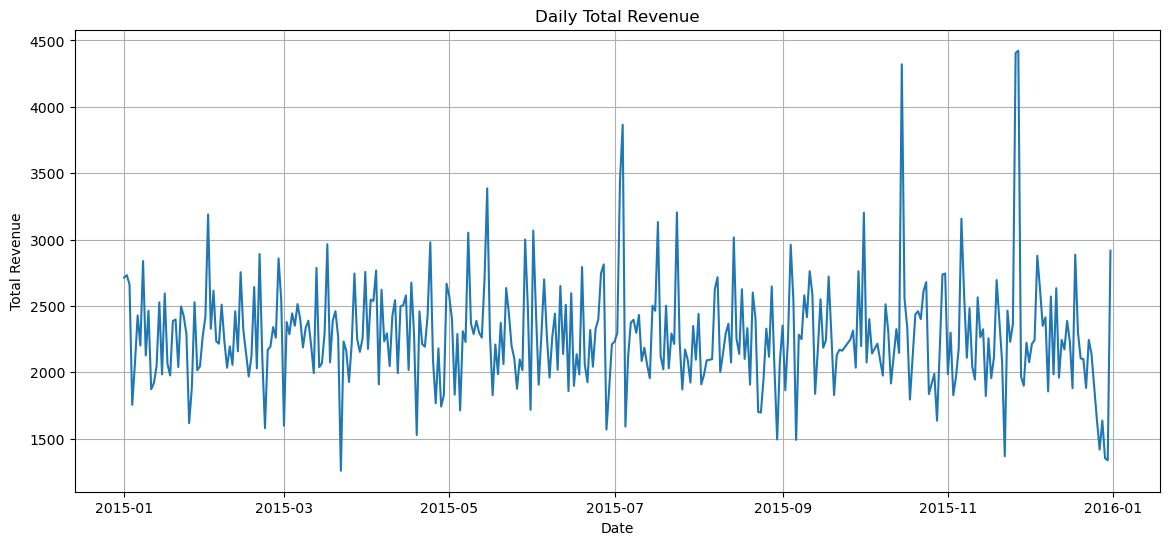

In [15]:
daily_rev_df = daily_revenue.reset_index()
daily_rev_df
plt.figure(figsize=(14, 6))
sns.lineplot(x = 'date' , y = 'total_revenue', data = daily_rev_df)
plt.title('Daily Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

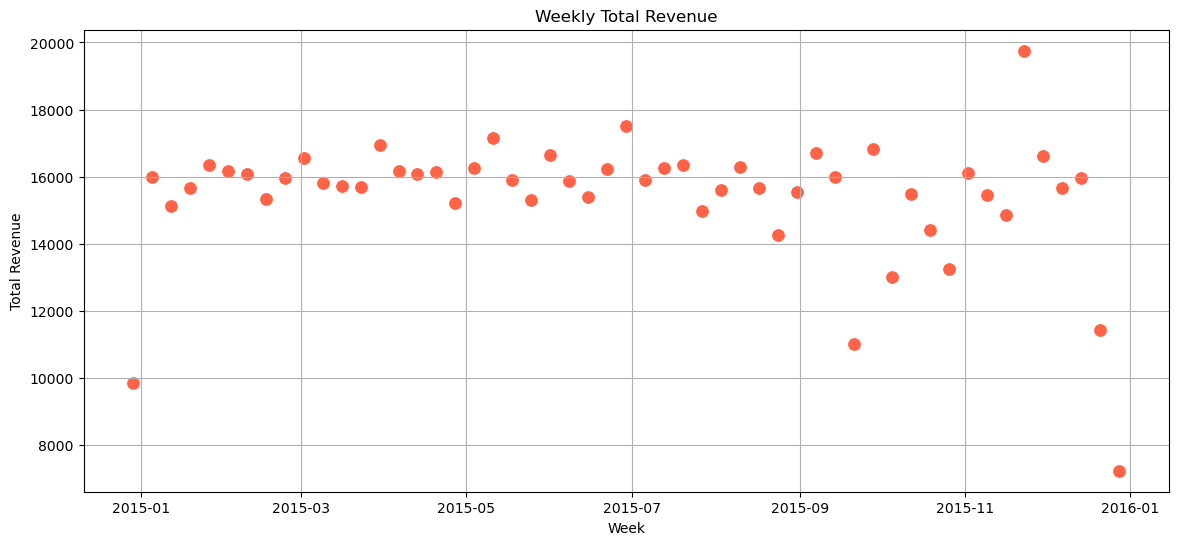

In [16]:
weekly_rev_df = weekly_revenue.reset_index()
weekly_rev_df['date'] = weekly_rev_df['date'].dt.start_time
weekly_rev_df

plt.figure(figsize = (14, 6))
sns.scatterplot(x = 'date', y = 'total_revenue', data = weekly_rev_df, s=100, color='tomato')
plt.title("Weekly Total Revenue")
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

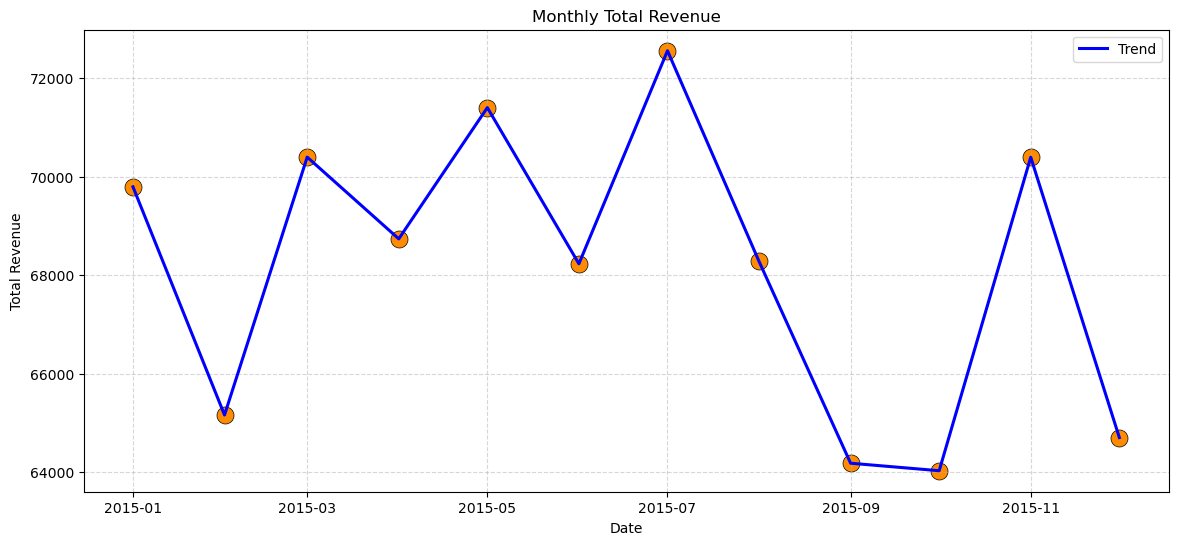

In [17]:
monthly_rev_df = monthly_revenue.reset_index()
monthly_rev_df['date'] = monthly_rev_df['date'].dt.to_timestamp()
monthly_rev_df

plt.figure(figsize=(14, 6))
sns.scatterplot(x = 'date' , y = 'total_revenue', data = monthly_rev_df, s=150, color='darkorange',
                edgecolor='black', linewidth=0.5)
sns.lineplot(data=monthly_rev_df, x='date', y='total_revenue', 
             color='blue', linewidth=2.2, label='Trend')
plt.title('Monthly Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [18]:
# 2. Revenue per pizza size (S, M, L, XL, XXL)
pizza_order_details['pizza_size_rev'] = pizza_order_details.groupby('size', observed=True).total_revenue.transform('sum')

In [19]:
pizza_order_details[['size', 'pizza_size_rev']].value_counts()

size  pizza_size_rev
L     375318.70         18526
M     249382.25         15385
S     178076.50         14137
XL    14076.00            544
XXL   1006.60              28
Name: count, dtype: int64

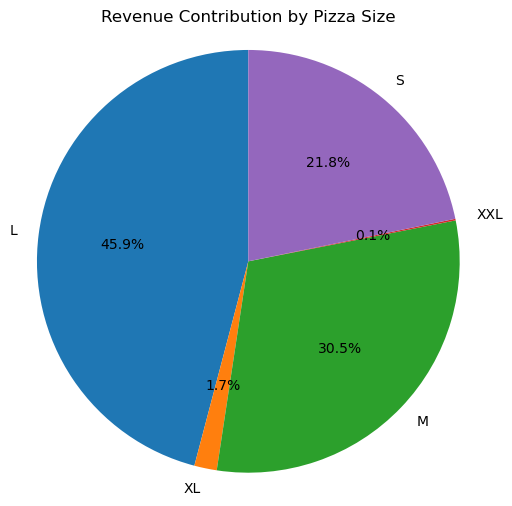

In [20]:
labels = ['L', 'XL', 'M', 'XXL', 'S']
labels
revenue = [375318.70, 14076.00, 249382.25, 1006.60, 178076.50]
revenue
plt.figure(figsize=(6, 6))
plt.pie(revenue, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Revenue Contribution by Pizza Size")
plt.axis('equal')  # Ensures pie is a circle
plt.show()

In [ ]:
# 3. Top-selling pizzas by revenue and quantity (most profitable or popular pizza)
# pizza_types['name'] = pizza_types['name'].str.replace("The ", '')
pizza_types.head()

In [21]:
top_pizzas = pd.merge(merged_df, pizza_types, on = 'pizza_type_id')

In [22]:
top_pizzas.drop(['order_details_id', 'order_id', 'date', 'time', 'ingredients'], axis = 1, inplace = True)
top_pizzas.head()

,pizza_id,pizza_type_id,size,price,quantity,total_revenue,name,category
0,bbq_ckn_s,bbq_ckn,S,12.75,1,12.75,The Barbecue Chicken Pizza,Chicken
1,bbq_ckn_s,bbq_ckn,S,12.75,1,12.75,The Barbecue Chicken Pizza,Chicken
2,bbq_ckn_s,bbq_ckn,S,12.75,1,12.75,The Barbecue Chicken Pizza,Chicken
3,bbq_ckn_s,bbq_ckn,S,12.75,1,12.75,The Barbecue Chicken Pizza,Chicken
4,bbq_ckn_s,bbq_ckn,S,12.75,1,12.75,The Barbecue Chicken Pizza,Chicken


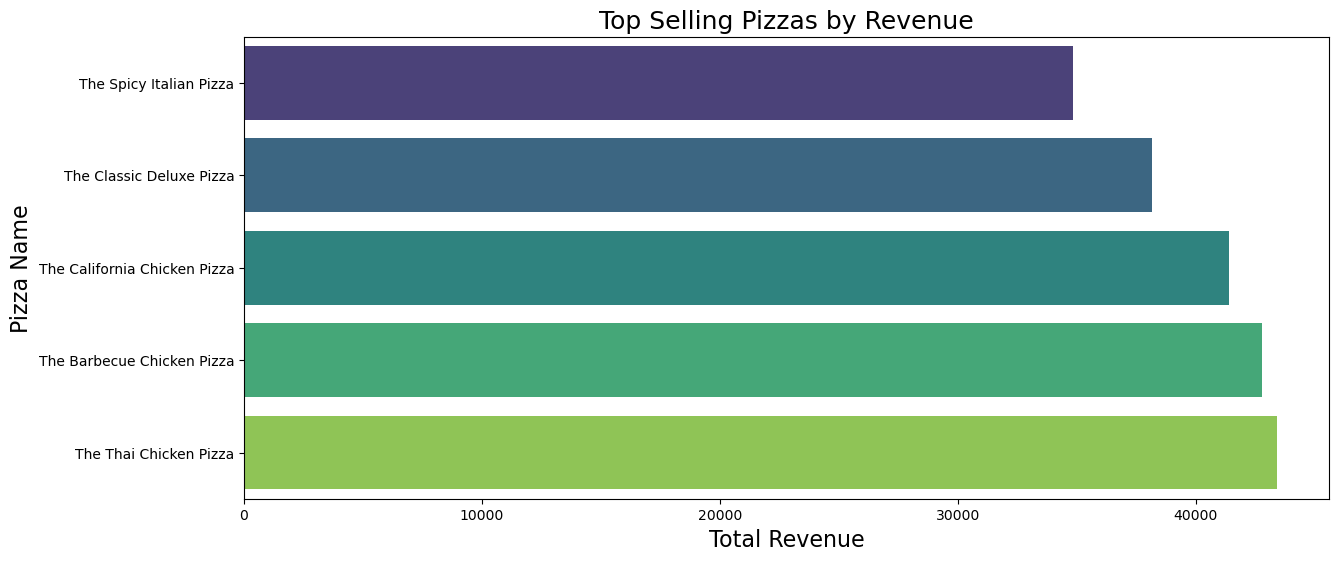

In [23]:
most_sold_pizzas = top_pizzas.groupby('name').total_revenue.sum()
most_sold_pizzas
a = most_sold_pizzas.sort_values(ascending = False).head()
df = pd.DataFrame(list(a.items()), columns = ['Pizza Name', 'Revenue'])
pizza_df = df.sort_values('Revenue', ascending=True)
plt.figure(figsize=(14, 6))
sns.barplot(data = pizza_df, x='Revenue', y='Pizza Name', hue = 'Pizza Name', palette='viridis')
plt.title('Top Selling Pizzas by Revenue', fontsize = 18)
plt.xlabel('Total Revenue', fontsize = 16)
plt.ylabel('Pizza Name', fontsize = 16)
plt.show()

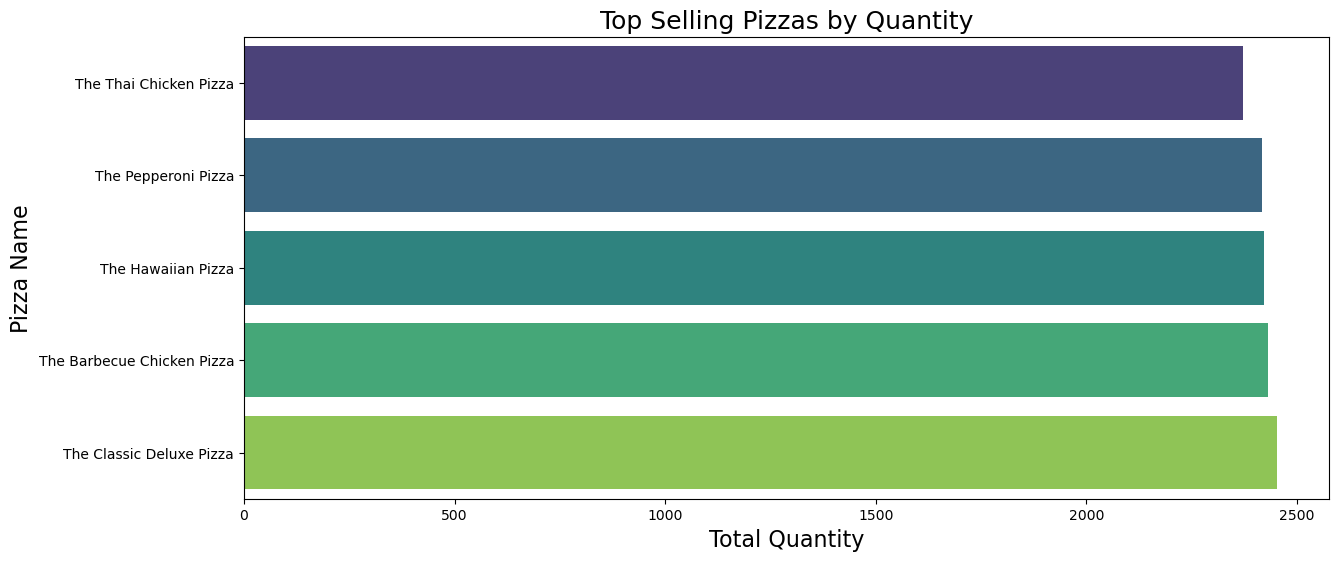

In [24]:
most_sold_pizzas_by_qty = top_pizzas.groupby('name').quantity.sum()
most_sold_pizzas_by_qty
b = most_sold_pizzas_by_qty.sort_values(ascending = False).head()
df1 = pd.DataFrame(list(b.items()), columns = ['Pizza Name', 'Quantity Sold'])
pizza_df1 = df1.sort_values('Quantity Sold', ascending=True)
plt.figure(figsize=(14, 6))
sns.barplot(data = pizza_df1, x='Quantity Sold', y='Pizza Name', hue = 'Pizza Name', palette='viridis')
plt.title('Top Selling Pizzas by Quantity', fontsize = 18)
plt.xlabel('Total Quantity', fontsize = 16)
plt.ylabel('Pizza Name', fontsize = 16)
plt.show()

In [ ]:
# 4. Most popular pizza categories (veg, chicken, classic, supreme)

In [25]:
most_sold_pizza_category = top_pizzas.groupby('category').quantity.sum()
most_sold_pizza_category

category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64

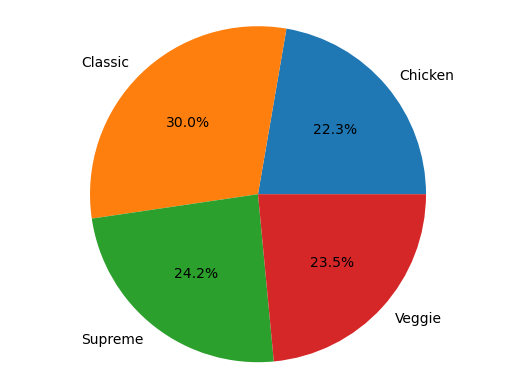

In [26]:
category = ['Chicken', 'Classic', 'Supreme', 'Veggie'] 
rev = [11050, 14888, 11987, 11649]
plt.pie(rev, labels = category, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [31]:
# 5. Revenue trend over time (seasonal spikes or drops in sales)
type(monthly_revenue)
monthly_revenue.head()
data = monthly_revenue

def get_season(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'

season = data.index.month.map(get_season)
season
seasonal_rev = data.groupby(season).sum().reindex(['Spring', 'Summer', 'Autumn', 'Winter'])
seasonal_rev.sort_values(ascending = False)

date
Spring    210536.65
Summer    209066.35
Winter    199654.05
Autumn    198603.00
Name: total_revenue, dtype: float64

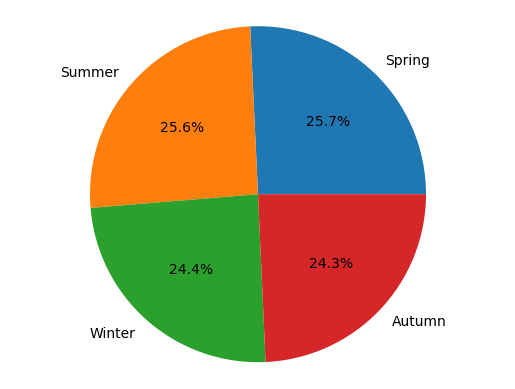

In [32]:
seasons = ['Spring', 'Summer', 'Winter', 'Autumn'] 
rev1 = [210536.65, 209066.35, 199654.05, 198603.00]
plt.pie(rev1, labels = seasons, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [33]:
# 6. Peak Ordering times during the day/week (at what time of the day and which days of the week)
orders.head()
pizza_order_details.head()

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity,total_revenue,pizza_size_rev
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1,12.75,178076.5
1,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1,12.75,178076.5
2,bbq_ckn_s,bbq_ckn,S,12.75,294,124,1,12.75,178076.5
3,bbq_ckn_s,bbq_ckn,S,12.75,458,194,1,12.75,178076.5
4,bbq_ckn_s,bbq_ckn,S,12.75,489,208,1,12.75,178076.5


In [39]:
orders = pd.read_csv("C:/Users/VIVEK/OneDrive/Desktop/Data Analytics Project/Project Pizzas/orders.csv")
data1 = pd.merge(pizza_order_details, orders, on = 'order_id')
data1.drop(['pizza_id', 'pizza_type_id', 'pizza_size_rev'], axis = 1, inplace = True)
data1.dtypes

size                category
price                float64
order_details_id       int64
order_id               int64
quantity               int64
total_revenue        float64
date                  object
time                  object
dtype: object

In [40]:
data1['datetime'] = pd.to_datetime(data1['date'] + ' ' + data1['time'])
data1.head(3)

,size,price,order_details_id,order_id,quantity,total_revenue,date,time,datetime
0,S,12.75,11,6,1,12.75,2015-01-01,12:29:36,2015-01-01 12:29:36
1,S,12.75,239,102,1,12.75,2015-01-02,17:54:04,2015-01-02 17:54:04
2,S,12.75,294,124,1,12.75,2015-01-02,20:12:34,2015-01-02 20:12:34


In [41]:
data1['hour'] = data1['datetime'].dt.hour
data1['day_of_week'] = data1['datetime'].dt.day_name()

In [43]:
orders_by_hour = data1.groupby('hour')['quantity'].sum()

In [44]:
orders_by_hour

hour
9        4
10      18
11    2728
12    6776
13    6413
14    3613
15    3216
16    4239
17    5211
18    5417
19    4406
20    3534
21    2545
22    1386
23      68
Name: quantity, dtype: int64

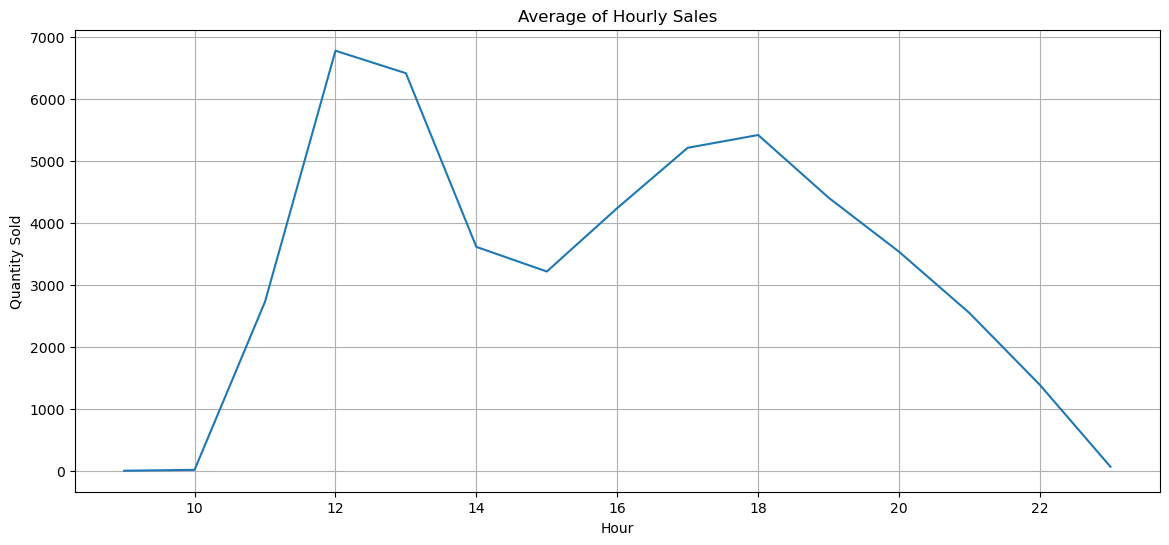

In [45]:
orders_hr = orders_by_hour.reset_index()
orders_hr.rename(columns = {'0': "quantity"})
orders_hr
plt.figure(figsize=(14, 6))
sns.lineplot(x = 'hour' , y = 'quantity', data = orders_hr)
plt.title('Average of Hourly Sales')
plt.xlabel('Hour')
plt.ylabel('Quantity Sold')
plt.grid()
plt.show()

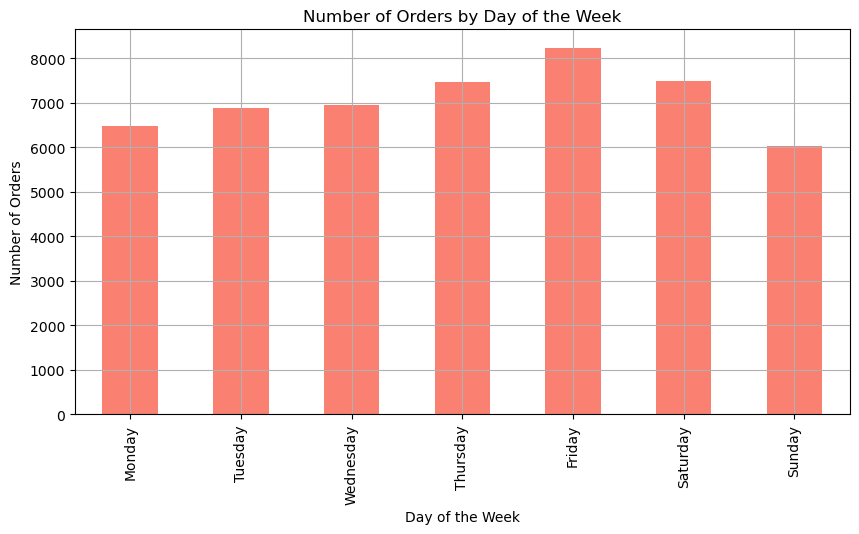

In [46]:
orders_by_day = data1.groupby('day_of_week')['quantity'].sum()
orders_by_day
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_day = orders_by_day.reindex(days_order)
plt.figure(figsize=(10, 5))
orders_by_day.plot(kind='bar', color='salmon')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

In [52]:
# 7. Average number of orders per day/week/month
data1.head()
data1['day'] = data1['datetime'].dt.date
a = data1.groupby('day').quantity.sum().mean()

In [49]:
data1['week'] = data1['datetime'].dt.to_period('W').apply(lambda r: r.start_time)
b = data1.groupby('week')['quantity'].sum().mean()

In [50]:
data1['month'] = data1['datetime'].dt.to_period('M').apply(lambda r: r.start_time)
c = data1.groupby('month')['quantity'].sum().mean()

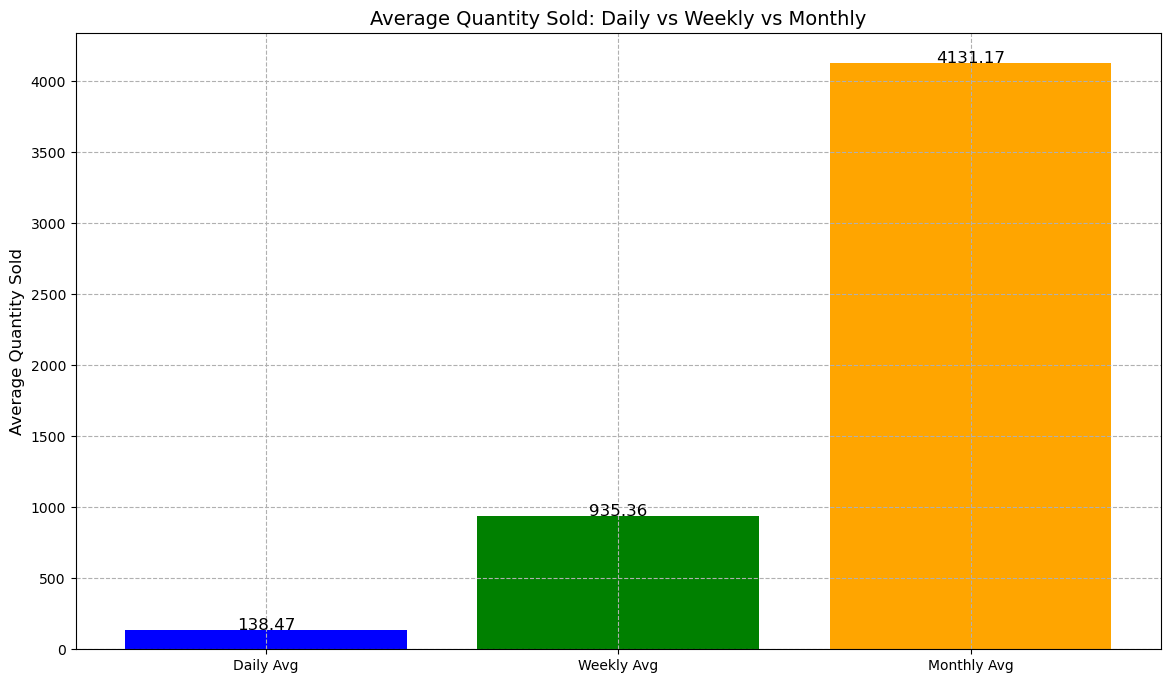

In [53]:
averages = [a, b, c]
labels = ['Daily Avg', 'Weekly Avg', 'Monthly Avg']
colors = ['b', 'g', 'orange']
plt.figure(figsize = (14, 8))
plt.bar(labels, averages, color = colors)

for i, value in enumerate(averages):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', fontsize=12)

plt.title('Average Quantity Sold: Daily vs Weekly vs Monthly', fontsize=14)
plt.ylabel('Average Quantity Sold', fontsize=12)
plt.grid(True, linestyle='--')
plt.show()

In [64]:
# 8. Average Order Value (avg revenue coming from each order)
# pizza_order_details.describe().loc['mean', 'total_revenue']

total_rev = pizza_order_details['total_revenue'].sum()
total_orders = pizza_order_details["order_id"].nunique()
avg_order_value = total_rev / total_orders
avg_order_value

np.float64(38.30726229508197)

In [68]:
# 9. Average Number of pizza per order (no of pizzas cx typically buy)
total_qty = pizza_order_details['quantity'].sum()
total_orders = pizza_order_details['order_id'].nunique()
avg_pizzas_ordered = total_qty / total_orders
avg_pizzas_ordered

np.float64(2.321967213114754)

In [73]:
# 10. Distribution of pizza sizes ordered (cx prefer larger or smaller pizzas)
size_preference = pizza_order_details.groupby('size', observed=True )['quantity'].sum().sort_values(ascending=False)
size_preference

size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

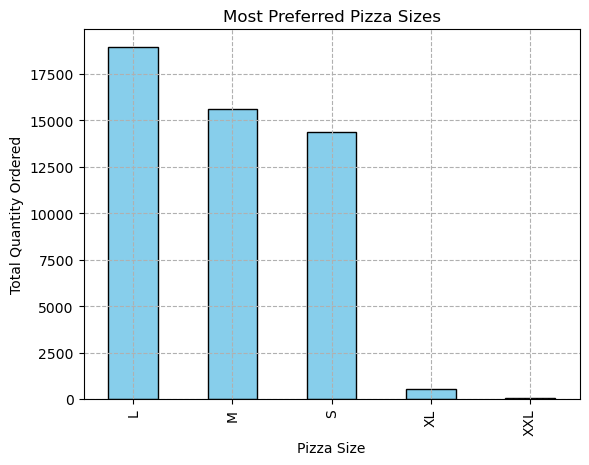

In [76]:
size_preference.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Most Preferred Pizza Sizes")
plt.xlabel("Pizza Size")
plt.ylabel("Total Quantity Ordered")
plt.grid(True, linestyle='--')
plt.show()

In [95]:
# 11. Most and least ordered pizza types (Highlight bestsellers and underperforming items)
least_ordered_pizzas = most_sold_pizzas_by_qty.sort_values(ascending = True).head()
least_ordered_pizzas

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

In [94]:
most_ordered_pizzas = most_sold_pizzas_by_qty.sort_values(ascending = False).head()
most_ordered_pizzas

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64